<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python  Tutorial
### Digital Vidya Copyright

### Pandas

Pandas is a Python library. It contains high-level data structures and manipulation tools designed to make data analysis fast and easy in Python. Pandas is built on top of NumPy and makes it easy to use in NumPy-centric applications.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


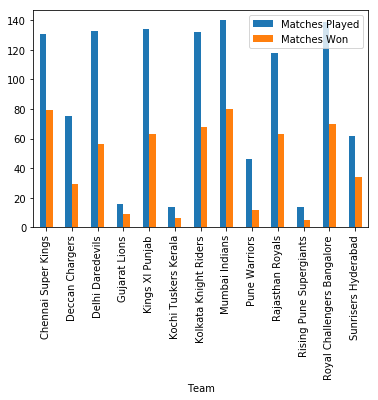

In [64]:
pd.merge(matches[['team1', 'team2']].stack().reset_index().groupby(0).count().reset_index().rename(columns = {0: 'Team', 'level_0': 'Matches Played'}),
         matches['winner'].value_counts().reset_index().rename(columns={'index': 'Team', 'winner': 'Matches Won'}), 
         on = 'Team').plot(x = 'Team', y = ['Matches Played', 'Matches Won'],kind = 'bar')


### Pandas Data Structures: Series (1d) and Dataframe(multi-d)
### Series
#### One-dimensional ndarray with axis labels

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [3]:
l = [4,2,7,9,5]
s = pd.Series(l)
s

0    4
1    2
2    7
3    9
4    5
dtype: int64

In [6]:
s = pd.Series([4,2,7,9,5], index=['a', 'b', 'c', 'd', 'e'])
s

a    4
b    2
c    7
d    9
e    5
dtype: int64

### Series from a Dictionary

In [66]:
employee = {'Empl_No': 'E_12345','Name': 'ABC', 'DOB': '31/12/1995','Join_date': '01/01/2015', 
            'Title': 'Data Analyst', 'Salary': '100000', 'Manager': 'XYZ'}
s = pd.Series(employee)
s

DOB            31/12/1995
Empl_No           E_12345
Join_date      01/01/2015
Manager               XYZ
Name                  ABC
Salary             100000
Title        Data Analyst
dtype: object

In [67]:
ipl = {'match_id_1': 'SRH', 'match_id_2': 'KKR', 'match_id_3': 'KXIP', 'match_id_4': 'RCB', 
       'match_id_5': 'MI', 'match_id_6': 'KKR', 'match_id_7': 'RCB'}
ipl = pd.Series(ipl)
ipl

match_id_1     SRH
match_id_2     KKR
match_id_3    KXIP
match_id_4     RCB
match_id_5      MI
match_id_6     KKR
match_id_7     RCB
dtype: object

### Dataframe

#### A DataFrame represents a tabular data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [8]:
df = pd.DataFrame(np.random.randn(10, 5))
df #top 5 rows

,0,1,2,3,4
0,0.251103,-0.328389,-0.516442,-0.366602,-0.232127
1,-0.018009,-0.452556,-0.501422,-0.720787,-0.383962
2,-1.157282,-0.340347,-1.083143,-0.616709,-0.366034
3,-0.115498,-0.586708,-0.184999,-0.636822,0.626167
4,1.085583,-0.791926,-1.067676,-1.019491,0.035421
5,0.499968,-1.327053,-0.844364,0.151915,1.024517
6,0.286548,0.340337,-0.733169,1.269537,0.846530
7,1.611018,-0.583036,-0.814811,-1.084135,-0.956613
8,0.200625,-1.724642,-0.852874,-2.202643,0.414383
9,-0.050237,-0.208529,0.418403,-0.298943,-1.255085


In [9]:
#Specify column names and index
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,0.923458,-0.754704,-0.017802,-2.458433,3.000617
1,-0.387414,2.788440,0.033531,0.340448,-0.856980
2,0.693474,1.036501,1.814568,-0.860864,-0.174425
3,-1.077018,-1.426150,-0.573233,-0.591066,-1.291240
4,0.410129,-1.322290,0.065955,0.051830,-0.879704


In [69]:
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'], index = list('QRSTUVWXYZ'))
df

,a,b,c,d,e
Q,0.172916,-1.612818,-1.868870,-0.137383,-0.029544
R,-0.126702,-0.138923,0.736486,-0.351181,0.429617
S,0.507446,0.796070,-0.795736,0.466803,0.035700
T,-0.783008,-1.768858,-0.233823,-0.386195,0.276996
U,1.143501,-1.214189,1.662435,2.230198,-1.228084
V,0.323103,1.279692,-0.279392,-0.371476,0.812596
W,-2.608799,0.157217,0.551860,0.274065,1.482728
X,-2.136907,0.456586,-2.361137,-0.857867,1.366960
Y,-0.109820,0.014673,0.874536,-0.054101,-1.717526
Z,1.434727,0.925971,0.991720,-2.166015,0.073360


### Create dataframe from a dictionary

In [68]:
ipl_season = {2016 : {'match_id_1': 'SRH', 'match_id_2': 'KKR', 'match_id_3': 'KXIP', 'match_id_4': 'RCB', 
                      'match_id_5': 'MI', 'match_id_6': 'KKR', 'match_id_7': 'RCB'},
              2017 : {'match_id_1': 'KKR', 'match_id_2': 'MI', 'match_id_3': 'KXIP', 'match_id_4': 'DD', 
                      'match_id_5': 'RCB'}}
ipl_season = pd.DataFrame(ipl_season)
ipl_season

,2016,2017
match_id_1,SRH,KKR
match_id_2,KKR,MI
match_id_3,KXIP,KXIP
match_id_4,RCB,DD
match_id_5,MI,RCB
match_id_6,KKR,NaN
match_id_7,RCB,NaN


### Viewing the data

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [12]:
df.head() #top rows, default value is 5
df.tail(3) #bottom rows

,a,b,c,d,e
X,-0.304451,0.421525,0.187896,-0.377623,-0.876819
Y,-0.700578,2.740194,0.665841,-1.566501,-1.003411
Z,0.377806,-0.164346,-0.889936,0.116889,0.158180


In [13]:
df.index

Index(['Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='object')

In [14]:
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [15]:
df.shape

(10, 5)

#### Rename columns

In [16]:
df.columns = ['apple', 'blueberry', 'carrot', 'drumsticks', 'pineapple']
df.head()

,apple,blueberry,carrot,drumsticks,pineapple
Q,-0.540856,1.105438,-0.252466,-0.801842,-2.499412
R,0.367655,0.285187,1.840252,1.109139,0.910081
S,0.087957,1.349522,-1.387942,0.453101,0.067768
T,0.468921,1.383470,-0.946399,-0.554933,-0.228276
U,0.466849,-0.289645,0.490703,-0.571223,-1.474997


In [17]:
df.index = list('ABCDEFGHIJ')
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [18]:
df.describe()

,apple,blueberry,carrot,drumsticks,pineapple
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.110125,0.489151,-0.076534,0.017159,-0.346342
std,0.556305,1.179053,0.991948,0.997791,1.177342
min,-0.700578,-1.275630,-1.387942,-1.566501,-2.499412
25%,-0.288304,-0.258320,-0.932283,-0.567151,-0.971763
50%,0.227806,0.353356,-0.032285,-0.130367,-0.171361
75%,0.444588,1.288501,0.487269,0.512576,0.135577
max,1.117817,2.740194,1.840252,1.832184,1.597916


In [19]:
data = pd.DataFrame({'numbers':[4,6,8,10,12,14]})
data.describe()

,numbers
count,6.000000
mean,9.000000
std,3.741657
min,4.000000
25%,6.500000
50%,9.000000
75%,11.500000
max,14.000000


In [20]:
#percentile : i + (j - i) * fraction
4 + (14-4)*(3/4)

11.5

#### Transpose

In [21]:
df.T #assignment is needed

,A,B,C,D,E,F,G,H,I,J
apple,-0.540856,0.367655,0.087957,0.468921,0.466849,-0.239865,1.117817,-0.304451,-0.700578,0.377806
blueberry,1.105438,0.285187,1.349522,1.383470,-0.289645,-1.275630,-0.664207,0.421525,2.740194,-0.164346
carrot,-0.252466,1.840252,-1.387942,-0.946399,0.490703,-0.950257,0.476968,0.187896,0.665841,-0.889936
drumsticks,-0.801842,1.109139,0.453101,-0.554933,-0.571223,0.532402,1.832184,-0.377623,-1.566501,0.116889
pineapple,-2.499412,0.910081,0.067768,-0.228276,-1.474997,-0.114446,1.597916,-0.876819,-1.003411,0.158180


In [22]:
df

,apple,blueberry,carrot,drumsticks,pineapple
A,-0.540856,1.105438,-0.252466,-0.801842,-2.499412
B,0.367655,0.285187,1.840252,1.109139,0.910081
C,0.087957,1.349522,-1.387942,0.453101,0.067768
D,0.468921,1.383470,-0.946399,-0.554933,-0.228276
E,0.466849,-0.289645,0.490703,-0.571223,-1.474997
F,-0.239865,-1.275630,-0.950257,0.532402,-0.114446
G,1.117817,-0.664207,0.476968,1.832184,1.597916
H,-0.304451,0.421525,0.187896,-0.377623,-0.876819
I,-0.700578,2.740194,0.665841,-1.566501,-1.003411
J,0.377806,-0.164346,-0.889936,0.116889,0.158180


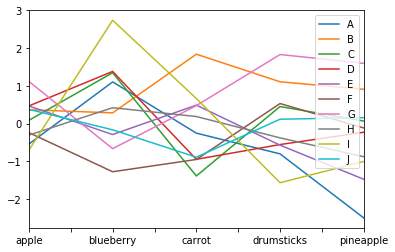

In [23]:
%matplotlib inline
df.T.plot()

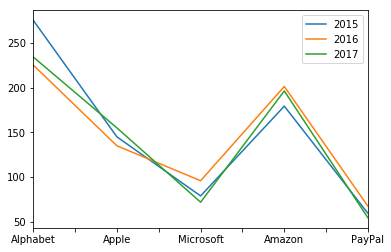

In [24]:
index = ['Alphabet', 'Apple', 'Microsoft', 'Amazon', 'PayPal']
df = pd.DataFrame({'2015': [275.28,144.99,78.95,179.27,59.39],'2016': [225.28,134.99,95.95,201.27,67.39],'2017': [234.28,154.99,71.95,196.27,54.39]},index=index)
df
df.plot()

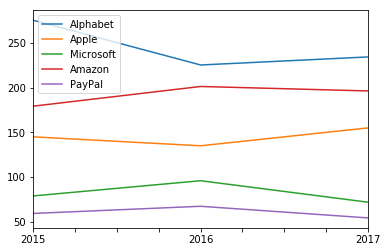

In [25]:
df.T.plot()

### Indexing and Selecting Data

#### Select a column

In [26]:
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'], index = list('QRSTUVWXYZ'))
df['e']

Q    2.262647
R   -0.586007
S   -0.573491
T    0.164675
U   -1.132284
V    1.278766
W    0.568247
X   -0.544325
Y   -0.863202
Z   -0.762136
Name: e, dtype: float64

In [27]:
deliveries = pd.read_csv('ipl/deliveries.csv') #<path> 
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#### Select multiple columns

In [28]:
df_small = df[['b', 'd', 'e']] #assignment is needed

#### Selecting a slice

In [29]:
df[-10:] #[0:9]
df[::-1] #reverse

,a,b,c,d,e
Z,-1.281213,-0.066714,-0.582592,-1.660558,-0.762136
Y,-0.972371,-1.043650,1.186301,0.661627,-0.863202
X,0.780021,-1.597129,0.019665,-0.080773,-0.544325
W,-0.951790,0.617563,0.648103,-0.259887,0.568247
V,0.021754,-0.162206,0.775907,0.841318,1.278766
U,0.753740,0.742936,0.852060,-1.201346,-1.132284
T,-1.066675,0.051707,0.409278,-0.313740,0.164675
S,0.569640,0.341757,1.396349,-0.872182,-0.573491
R,1.642972,-0.918632,0.028143,-0.197794,-0.586007
Q,-0.689452,0.418568,0.097698,0.545767,2.262647


In [30]:
df['S':'U']

,a,b,c,d,e
S,0.569640,0.341757,1.396349,-0.872182,-0.573491
T,-1.066675,0.051707,0.409278,-0.313740,0.164675
U,0.753740,0.742936,0.852060,-1.201346,-1.132284


### Selection by Label : loc

https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label

In [31]:
df.loc[:, ['a','c']]#.head() #(10,5) (row, column)

,a,c
Q,-0.689452,0.097698
R,1.642972,0.028143
S,0.569640,1.396349
T,-1.066675,0.409278
U,0.753740,0.852060
V,0.021754,0.775907
W,-0.951790,0.648103
X,0.780021,0.019665
Y,-0.972371,1.186301
Z,-1.281213,-0.582592


In [32]:
df.loc['T': 'Z', 'c':'e'] # :slice

,c,d,e
T,0.409278,-0.313740,0.164675
U,0.852060,-1.201346,-1.132284
V,0.775907,0.841318,1.278766
W,0.648103,-0.259887,0.568247
X,0.019665,-0.080773,-0.544325
Y,1.186301,0.661627,-0.863202
Z,-0.582592,-1.660558,-0.762136


In [33]:
df.loc['T': 'Y', ['a','d']] 

,a,d
T,-1.066675,-0.313740
U,0.753740,-1.201346
V,0.021754,0.841318
W,-0.951790,-0.259887
X,0.780021,-0.080773
Y,-0.972371,0.661627


### Selection by Position: iloc

http://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-integer

In [34]:
df.iloc[:2, :2] #index based slice, upper - bound is not included

,a,b
Q,-0.689452,0.418568
R,1.642972,-0.918632


In [35]:
df.iloc[2, 2]

1.396348869944563

In [36]:
df.iloc[[1,3,5], [0,2,4]] #1:3

,a,c,e
R,1.642972,0.028143,-0.586007
T,-1.066675,0.409278,0.164675
V,0.021754,0.775907,1.278766


In [208]:
df.loc[df.id == 'e', 'val2'] = 100
df

,id,val1,val2
0,a,4.0,8.0
1,b,NaN,3.0
2,NaN,7.0,NaN
3,d,9.0,4.0
4,e,5.0,100.0


### Boolean Indexing

In [37]:
df = pd.DataFrame({'id': ['a', 'b', 'c', 'd', 'e'],'val':[4,2,7,9,5]})
df 
#select rows where id is equal to a or val > 5

,id,val
0,a,4
1,b,2
2,c,7
3,d,9
4,e,5


In [38]:
df[df.val > 5]

,id,val
2,c,7
3,d,9


In [39]:
#Multiple Conditions

#df[(df.val > 4)&(df.id != 'c')] 
df[(df.val>5) | (df.id=='a')] #bitwise operators | or operator, & and operator. You cannot use and or

,id,val
0,a,4
2,c,7
3,d,9


### isin()

In [40]:
#select only the rows from the dataframe with id in the list
l = ['a', 'd', 'e']
df[df.id.isin(l)]

,id,val
0,a,4
3,d,9
4,e,5


In [186]:
deliveries = pd.read_csv('ipl/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [187]:
key_batsmen = ['MS Dhoni', 'V Kohli', 'R Sharma']
deliveries[deliveries.batsman.isin(key_batsmen)].head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
132,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,W Jaffer,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,3,V Kohli,W Jaffer,I Sharma,0,...,0,4,0,0,0,4,4,NaN,NaN,NaN
134,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,4,V Kohli,W Jaffer,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,V Kohli,W Jaffer,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
138,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,2,V Kohli,W Jaffer,AB Dinda,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN


### Handling Missing Data

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html


In [188]:
df = pd.DataFrame({'id': ['a', 'b', np.nan, 'd', 'e'],'val1':[4,np.nan,7,9,5], 'val2': [8,3,np.nan, 4,np.nan]})
df#.isnull() # not a number

,id,val1,val2
0,a,4.0,8.0
1,b,NaN,3.0
2,NaN,7.0,NaN
3,d,9.0,4.0
4,e,5.0,NaN


In [44]:
df.dropna(axis =0) #default axis 0, use axis = 1 to drop column

,id,val1,val2
0,a,4.0,8.0
3,d,9.0,4.0


#### fillna(method = {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None})

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [45]:
df.fillna(0) #assignment needed

,id,val1,val2
0,a,4.0,8.0
1,b,0.0,3.0
2,0,7.0,0.0
3,d,9.0,4.0
4,e,5.0,0.0


In [46]:
df.fillna('duh') #can even fillna by a string

,id,val1,val2
0,a,4,8
1,b,duh,3
2,duh,7,duh
3,d,9,4
4,e,5,duh


In [47]:
df.fillna(method = 'bfill')

,id,val1,val2
0,a,4.0,8.0
1,b,7.0,3.0
2,d,7.0,4.0
3,d,9.0,4.0
4,e,5.0,NaN


In [48]:
df.fillna(method = 'ffill')

,id,val1,val2
0,a,4.0,8.0
1,b,4.0,3.0
2,b,7.0,3.0
3,d,9.0,4.0
4,e,5.0,4.0


In [49]:
df.ffill()

,id,val1,val2
0,a,4.0,8.0
1,b,4.0,3.0
2,b,7.0,3.0
3,d,9.0,4.0
4,e,5.0,4.0


### Filling  with pandas object

In [50]:
#fill the na values by the mean of the column
df.fillna(df.mean())

,id,val1,val2
0,a,4.00,8.0
1,b,6.25,3.0
2,NaN,7.00,5.0
3,d,9.00,4.0
4,e,5.00,5.0


In [51]:
#Fill NAs by another series
df['val3'] = pd.Series([9,6,3,8,1])
df.val1 = df.val1.fillna(df.val3) #series which is another column in the same df
df

,id,val1,val2,val3
0,a,4.0,8.0,9
1,b,6.0,3.0,6
2,NaN,7.0,NaN,3
3,d,9.0,4.0,8
4,e,5.0,NaN,1


In [52]:
s = pd.Series([100,321,45,87,234, 3]) 
df.val1 = df.val1.fillna(s) #s does not have to be a part of the df
df.val2 = df.val2.fillna(s)
df.id = df.id.fillna(s)
df

,id,val1,val2,val3
0,a,4.0,8.0,9
1,b,6.0,3.0,6
2,45,7.0,45.0,3
3,d,9.0,4.0,8
4,e,5.0,234.0,1


In [53]:
#interpolation
df = pd.DataFrame({'id': ['a', 'b', 'c', np.nan, 'e', 'f'],'val1':[5,np.nan,15,20,np.nan, 30]})
df.interpolate()

,id,val1
0,a,5.0
1,b,10.0
2,c,15.0
3,NaN,20.0
4,e,25.0
5,f,30.0


### Replace values in a dataframe
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [54]:
df = pd.DataFrame({'id': ['a', 'b', 'c', 'd', 'e'],'val1':[10,8,30,40,23]})
df#['id']

,id,val1
0,a,10
1,b,8
2,c,30
3,d,40
4,e,23


In [55]:
df.replace(10, 200, inplace = True)

In [56]:
df.replace(['a', 'b'], 'a_b')

,id,val1
0,a_b,200
1,a_b,8
2,c,30
3,d,40
4,e,23


In [57]:
df.replace({'a': 'atoz', 'b': 'btoz'})

,id,val1
0,atoz,200
1,btoz,8
2,c,30
3,d,40
4,e,23


In [58]:
d = {'a': 'abc', 'b': 'bcd', 'c': 'cde', 'd': 'def','e':'efg'}
df.replace(d)

,id,val1
0,abc,200
1,bcd,8
2,cde,30
3,def,40
4,efg,23


#### pd.Series.map
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

In [59]:
df.id = df.id.map(d)
df

,id,val1
0,abc,200
1,bcd,8
2,cde,30
3,def,40
4,efg,23


### Different scenarios in Data Analysis:

In [ ]:
#Missing data

In [210]:
#String Manipulation: values in the form of a string
df = pd.DataFrame({'Player': ['Duminy (c)', 'Morkel', 'Sharma (c)', 'Bravo', 'Malinga', 'Kohli (c)', 'Dhoni']})
df
df[df.Player.str.contains('(c)')]

,Player
0,Duminy (c)
2,Sharma (c)
5,Kohli (c)


In [211]:
#Messy Data: multiple values in each cell
    
df = pd.DataFrame({'Movie':['Toy Story (1995)', 'Golden Eye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copy cat (1995)']})
df

,Movie
0,Toy Story (1995)
1,Golden Eye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copy cat (1995)


In [212]:
df['Movie'] = df['Movie'].astype(str)
df['Title'] = df.Movie.str.extract('([A-Za-z ]+)', expand = False)
df['Year'] = df.Movie.str.extract('(\d+)', expand = False)
df

,Movie,Title,Year
0,Toy Story (1995),Toy Story,1995
1,Golden Eye (1995),Golden Eye,1995
2,Four Rooms (1995),Four Rooms,1995
3,Get Shorty (1995),Get Shorty,1995
4,Copy cat (1995),Copy cat,1995


In [115]:
#Time Series data: stock, any data with datetime column

In [ ]:
#Encoding

### Reindex,  set_index and reset_index()

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

In [213]:
index = ['Alphabet', 'Apple', 'Microsoft', 'Amazon', 'PayPal']
df = pd.DataFrame({'stock_price': [1004.28,154.99,71.95,1010.27,54.39]},index=index)
df

,stock_price
Alphabet,1004.28
Apple,154.99
Microsoft,71.95
Amazon,1010.27
PayPal,54.39


In [215]:
new_index = ['Alphabet', 'Apple', 'Amazon','Linkedin', 'Visa']
df = df.reindex(new_index)
df

,stock_price
Alphabet,1004.28
Apple,154.99
Amazon,1010.27
Linkedin,NaN
Visa,NaN


### set_index
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html

https://pandas.pydata.org/pandas-docs/stable/advanced.html

In [216]:
df = pd.DataFrame({'Stock_price': [1004.28,154.99,71.95,1010.27,54.39], 'Year': ['2016','2017','2016','2017','2017'],
                   'Company':['Alphabet', 'Alphabet', 'Microsoft', 'Amazon', 'Amazon']})
df

,Company,Stock_price,Year
0,Alphabet,1004.28,2016
1,Alphabet,154.99,2017
2,Microsoft,71.95,2016
3,Amazon,1010.27,2017
4,Amazon,54.39,2017


In [218]:
df.set_index('Company')
df.set_index(['Company', 'Year']) #multi-index dataframe

Stock_price
Company   Year             
Alphabet  2016      1004.28
          2017       154.99
Microsoft 2016        71.95
Amazon    2017      1010.27
          2017        54.39

In [128]:
time_series = pd.DataFrame({'date': ['12:00:00 01/01/2000', '12:00:00 01/01/2001' ,'12:00:00 01/01/2002' ,'15:00:00 01/01/2000', '15:00:00 01/01/2001','15:00:00 01/01/2002'],
                          'val': [93,61,30,54,12,87]})
time_series

,date,val
0,12:00:00 01/01/2000,93
1,12:00:00 01/01/2001,61
2,12:00:00 01/01/2002,30
3,15:00:00 01/01/2000,54
4,15:00:00 01/01/2001,12
5,15:00:00 01/01/2002,87


In [130]:
time_series.set_index('date',inplace = True)#assign the result to df or use inplace = True
time_series

,val
date,
12:00:00 01/01/2000,93
12:00:00 01/01/2001,61
12:00:00 01/01/2002,30
15:00:00 01/01/2000,54
15:00:00 01/01/2001,12
15:00:00 01/01/2002,87


### reset_index()
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html

In [131]:
time_series.reset_index()

,date,val
0,12:00:00 01/01/2000,93
1,12:00:00 01/01/2001,61
2,12:00:00 01/01/2002,30
3,15:00:00 01/01/2000,54
4,15:00:00 01/01/2001,12
5,15:00:00 01/01/2002,87


## Operations

In [219]:
df = pd.DataFrame(np.random.randn(5,2), index = ['a','b','c','d','e'], columns = ['col1', 'col2'])
df

,col1,col2
a,-1.200961,-0.139885
b,0.395764,-1.142392
c,1.883544,-1.420942
d,-0.128697,-0.246778
e,-0.894922,-0.155081


In [221]:
#df.mean()
df.mean(1) #axis = 1

a   -0.670423
b   -0.373314
c    0.231301
d   -0.187737
e   -0.525002
dtype: float64

In [222]:
df.sum()
df.sum(1)

a   -1.340847
b   -0.746627
c    0.462603
d   -0.375475
e   -1.050003
dtype: float64

In [223]:
df.max(1)

a   -0.139885
b    0.395764
c    1.883544
d   -0.128697
e   -0.155081
dtype: float64

### Add row to the dataframe

In [224]:
df.loc['mean'] = df.mean()
df

,col1,col2
a,-1.200961,-0.139885
b,0.395764,-1.142392
c,1.883544,-1.420942
d,-0.128697,-0.246778
e,-0.894922,-0.155081
mean,0.010946,-0.621016


### Add column to the dataframe

In [231]:
df['mean'] = df.mean(1)
df

,col1,col2,mean
a,-1.200961,-0.139885,-0.670423
b,0.395764,-1.142392,-0.373314
c,1.883544,-1.420942,0.231301
d,-0.128697,-0.246778,-0.187737
e,-0.894922,-0.155081,-0.525002
mean,0.010946,-0.621016,-0.305035


### Apply functions to dataframe
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

In [232]:
#sum, mean, max, min, first, last, count, size
df.apply(np.mean)

col1    0.010946
col2   -0.621016
mean   -0.305035
dtype: float64

In [233]:
#Apply custom function

df = pd.DataFrame({'celcius': [35,42,24,15,0]})
df

,celcius
0,35
1,42
2,24
3,15
4,0


In [105]:
def temp_converter(t):
    return ((t*9/5)+32)

df['farenheit'] = df.celcius.apply(temp_converter)
df

,celcius,farenheit
0,35,95.0
1,42,107.6
2,24,75.2
3,15,59.0
4,0,32.0


In [237]:
#Anonymous function: lambda 
df = pd.DataFrame({'celcius': [35,np.nan,24,15,0], 'blah': [100,100,100,100,100]})
df['new_farenheit'] = df.celcius.apply(lambda x: (x*9/5)+32)
df

,blah,celcius,new_farenheit
0,100,35.0,95.0
1,100,NaN,NaN
2,100,24.0,75.2
3,100,15.0,59.0
4,100,0.0,32.0


### pandas.Series.value_counts(): Returns object containing counts of unique values
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [239]:
df = pd.DataFrame({'fruits': ['Pear','Mango','Pear','Mango','Orange','Mango','Apple','Mango','Pear','Apple','Orange','Apple','Mango','Mango','Apple','Orange','Apple', 'Orange','Mango', 'Banana', 'Pear', 'Mango']})
df

,fruits
0,Pear
1,Mango
2,Pear
3,Mango
4,Orange
5,Mango
6,Apple
7,Mango
8,Pear
9,Apple


In [247]:
df.fruits.value_counts() #works only on the series

Mango     8
Apple     5
Orange    4
Pear      4
Banana    1
Name: fruits, dtype: int64

In [258]:
deliveries.head()
deliveries.batsman.value_counts().head()

V Kohli       3237
SK Raina      3059
G Gambhir     3028
RG Sharma     2996
RV Uthappa    2721
Name: batsman, dtype: int64

## Groupby: Split-Apply-Combine
http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [262]:
df = pd.DataFrame({'char': pd.Series(['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd', 'd', 'e']) ,
                   'num': [1,0,1,1, 5,3,9,6,4,1, 15]})
df

,char,num
0,a,1
1,a,0
2,a,1
3,b,1
4,b,5
5,c,3
6,c,9
7,d,6
8,d,4
9,d,1


In [272]:
#Find the sum of num for each char
grp = df.groupby('char').sum()

,num
char,
a,2
b,6
c,12
d,11
e,15


In [274]:
df1 = df.groupby('char').sum().reset_index()
df1
#Try different functions like mean, count, size, min, max on the dataframe and see the output

,char,num
0,a,2
1,b,6
2,c,12
3,d,11
4,e,15


In [280]:
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending = False).head()

batsman
V Kohli      4115
SK Raina     4106
RG Sharma    3874
G Gambhir    3634
CH Gayle     3451
Name: batsman_runs, dtype: int64

### Groupby Multiple columns

In [282]:

df = pd.DataFrame([[1.1, 1.1, 1.1, 2.6, 2.5, 3.4,2.6,2.6,3.4,3.4,2.6,1.1,1.1,3.3], list('AAABBBBABCBDDD'), 
                   [1.1, 1.7, 2.5, 2.6, 3.3, 3.8,4.0,4.2,4.3,4.5,4.6,4.7,4.7,4.8], 
                   ['1','3','3','2','4','2','5','3','6','3','5','1','1','1']]).T
df.columns = ['col1','col2','col3','col4']
df

,col1,col2,col3,col4
0,1.1,A,1.1,1
1,1.1,A,1.7,3
2,1.1,A,2.5,3
3,2.6,B,2.6,2
4,2.5,B,3.3,4
5,3.4,B,3.8,2
6,2.6,B,4,5
7,2.6,A,4.2,3
8,3.4,B,4.3,6
9,3.4,C,4.5,3


In [283]:
#Group the df by col1 and col2 and find sum of col3, unique values in col4, and highest value in col5
df.groupby(['col2', 'col1']).col3.sum() #sum of col3 

col2  col1
A     1.1      5.3
      2.6      4.2
B     2.5      3.3
      2.6     11.2
      3.4      8.1
C     3.4      4.5
D     1.1      9.4
      3.3      4.8
Name: col3, dtype: float64

In [285]:
df.groupby(['col1', 'col2']).col4.max().reset_index() #highest value col4

,col1,col2,col4
0,1.1,A,3
1,1.1,D,1
2,2.5,B,4
3,2.6,A,3
4,2.6,B,5
5,3.3,D,1
6,3.4,B,6
7,3.4,C,3


In [287]:
deliveries.groupby(['inning', 'batsman']).batsman_runs.sum().sort_values(ascending = False).head(10)

inning  batsman       
1       SK Raina          2452
        RG Sharma         2208
        V Kohli           2172
        MS Dhoni          2072
2       G Gambhir         2052
        RV Uthappa        2030
1       AB de Villiers    1962
2       V Kohli           1938
1       S Dhawan          1914
        CH Gayle          1842
Name: batsman_runs, dtype: int64

### Groupby-aggregate

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [292]:
df = pd.DataFrame([[1.1, 1.1, 1.1, 2.6, 2.5, 3.4,2.6,2.6,3.4,3.4,2.6,1.1,1.1,3.3], list('AAABBBBABCBDDD'), 
                   [1.1, 1.7, 2.5, 2.6, 3.3, 3.8,4.0,4.2,4.3,4.5,4.6,4.7,4.7,4.8], 
                   ['1','3','3','2','4','2','5','3','6','3','5','1','1','1']]).T
df.columns = ['col1','col2','col3','col4']
df.head()

,col1,col2,col3,col4
0,1.1,A,1.1,1
1,1.1,A,1.7,3
2,1.1,A,2.5,3
3,2.6,B,2.6,2
4,2.5,B,3.3,4


In [291]:
# Find sum of col3 and sum of col4
#df.groupby(['col1', 'col2']).agg({'col3': 'sum', 'col4': 'max'})#.reset_index() #different coumns
df.groupby(['col1', 'col2']).col4.agg(['min','max']).reset_index() # same column, different functions


,col1,col2,min,max
0,1.1,A,1,3
1,1.1,D,1,1
2,2.5,B,4,4
3,2.6,A,3,3
4,2.6,B,2,5
5,3.3,D,1,1
6,3.4,B,2,6
7,3.4,C,3,3


### groupby-transform

In [296]:
df['col4_max'] = df.groupby(['col1', 'col2']).col4.transform('max')
df.head()

,col1,col2,col3,col4,col4_max
0,1.1,A,1.1,1,3
1,1.1,A,1.7,3,3
2,1.1,A,2.5,3,3
3,2.6,B,2.6,2,5
4,2.5,B,3.3,4,4


In [307]:
deliveries = pd.read_csv('ipl/deliveries.csv')
deliveries['total_batsman_runs'] = deliveries.groupby('batsman').batsman_runs.transform('sum')

#### Iris dataset

In [316]:
iris = pd.read_csv('iris.csv')
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [317]:
iris.drop('Unnamed: 0', axis = 1,inplace=True)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [319]:
iris.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [41]:
iris.groupby('Species').std()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


#### Imdb dataset

Download link: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

In [320]:
imdb = pd.read_csv('movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [321]:
imdb.shape

(5043, 28)

In [322]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [325]:
imdb_select = imdb[['movie_title','director_name', 'gross','budget','title_year','genres','actor_1_name','actor_2_name','country','imdb_score','content_rating']]
imdb_select.head()

,movie_title,director_name,gross,budget,title_year,genres,actor_1_name,actor_2_name,country,imdb_score,content_rating
0,Avatar,James Cameron,760505847.0,237000000.0,2009.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Joel David Moore,USA,7.9,PG-13
1,Pirates of the Caribbean: At World's End,Gore Verbinski,309404152.0,300000000.0,2007.0,Action|Adventure|Fantasy,Johnny Depp,Orlando Bloom,USA,7.1,PG-13
2,Spectre,Sam Mendes,200074175.0,245000000.0,2015.0,Action|Adventure|Thriller,Christoph Waltz,Rory Kinnear,UK,6.8,PG-13
3,The Dark Knight Rises,Christopher Nolan,448130642.0,250000000.0,2012.0,Action|Thriller,Tom Hardy,Christian Bale,USA,8.5,PG-13
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Rob Walker,NaN,7.1,NaN


In [327]:
imdb_select.groupby('director_name').gross.sum().sort_values(ascending = False).head()

director_name
Steven Spielberg    4.114233e+09
Peter Jackson       2.592969e+09
Michael Bay         2.231243e+09
Tim Burton          2.071275e+09
Sam Raimi           2.049549e+09
Name: gross, dtype: float64

In [198]:
imdb_select.director_name.value_counts()[:10] #series.value_counts()

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Spike Lee            16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

In [332]:
#applying same function on multiple columns
imdb_select.groupby(['director_name', 'actor_1_name'])['gross', 'budget'].sum().sort_values(by = 'gross',ascending = False).head()

,,gross,budget
director_name,actor_1_name,,
Joss Whedon,Chris Hemsworth,1.705551e+09,6.900000e+08
Sam Raimi,J.K. Simmons,1.485313e+09,9.050000e+08
Gore Verbinski,Johnny Depp,1.250323e+09,1.015000e+09
George Lucas,Natalie Portman,1.165483e+09,3.430000e+08
Tim Burton,Johnny Depp,1.070126e+09,7.280000e+08


In [336]:
# For each director and actor_1, find sum of gross and mean of budget
imdb_select.groupby(['director_name', 'actor_1_name']).agg({'gross': 'sum', 'budget': 'mean'})

,,gross,budget
director_name,actor_1_name,,
A. Raven Cruz,Scott Levy,NaN,1000000.0
Aaron Hann,Jordi Vilasuso,NaN,NaN
Aaron Schneider,Bill Murray,9176553.0,7500000.0
Aaron Seltzer,Alyson Hannigan,48546578.0,20000000.0
Abel Ferrara,Isabella Rossellini,1227324.0,12500000.0
Adam Brooks,Ryan Reynolds,31973840.0,NaN
Adam Carolla,Jay Mohr,105943.0,1500000.0
Adam Goldberg,Judy Greer,2580.0,1650000.0
Adam Green,Joel David Moore,NaN,1500000.0


In [340]:
imdb_select.groupby('director_name').imdb_score.mean().sort_values(ascending = False).head()

director_name
John Blanchard      9.5
Sadyk Sher-Niyaz    8.7
Mitchell Altieri    8.7
Cary Bell           8.7
Mike Mayhall        8.6
Name: imdb_score, dtype: float64

In [341]:
imdb_select[imdb_select.director_name == 'John Blanchard'] #boolean indexing

,movie_title,director_name,gross,budget,title_year,genres,actor_1_name,actor_2_name,country,imdb_score,content_rating
2765,Towering Inferno,John Blanchard,NaN,NaN,NaN,Comedy,Martin Short,Andrea Martin,Canada,9.5,NaN


In [202]:
imdb_select.groupby(['title_year', 'genres']).movie_title.count()#[::-1].head()

title_year  genres                              
1916.0      Drama|History|War                       1
1920.0      Crime|Drama                             1
1925.0      Drama|Romance|War                       1
1927.0      Drama|Sci-Fi                            1
1929.0      Crime|Drama|Romance                     1
            Musical|Romance                         1
1930.0      Drama|War                               1
1932.0      Drama|Romance|War                       1
1933.0      Comedy|Drama|History|Musical|Romance    1
            Comedy|Musical|Romance                  1
1934.0      Comedy|Romance                          1
1935.0      Comedy|Musical|Romance                  1
1936.0      Action|Adventure|Romance|War            1
            Comedy|Drama|Family                     1
1937.0      Adventure|Drama|Romance                 1
            Animation|Family|Fantasy|Musical        1
1938.0      Comedy|Drama|Romance                    1
            Drama|Musical|Romance

In [203]:
imdb_select.genres.str.split('|', expand = True).stack().value_counts().head()

Drama       2594
Comedy      1872
Thriller    1411
Action      1153
Romance     1107
dtype: int64

In [204]:
imdb_select.genres.value_counts().head()

Drama                   236
Comedy                  209
Comedy|Drama            191
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: genres, dtype: int64

In [205]:
#Count of movies with each the content ratings per year
imdb_select.groupby(['title_year', 'content_rating']).movie_title.count()[::-1].head(10)

title_year  content_rating
2016.0      R                 32
            PG-13             46
            PG                12
            Not Rated          2
2015.0      Unrated            1
            TV-14              1
            R                 81
            PG-13             64
            PG                28
            Not Rated          5
Name: movie_title, dtype: int64

In [206]:
#most common director - actor combination
imdb_select.groupby(['director_name', 'actor_1_name']).movie_title.count().sort_values(ascending = False).head(10)

director_name    actor_1_name     
Woody Allen      Woody Allen          10
Clint Eastwood   Clint Eastwood       10
Tim Burton       Johnny Depp           7
Martin Scorsese  Robert De Niro        7
Sam Raimi        J.K. Simmons          5
John Carpenter   Jamie Lee Curtis      5
Martin Scorsese  Leonardo DiCaprio     5
Wes Anderson     Bill Murray           5
Mel Brooks       Madeline Kahn         5
Jason Reitman    J.K. Simmons          5
Name: movie_title, dtype: int64